In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
c_R_w = np.array([[1/sqrt(2)  ,1/sqrt(2) , 0 ],
                  [-1/sqrt(2) , 1/sqrt(2) , 0 ],
                  [0          , 0         , 1]]) # rotation matrix

c_t_w = np.array([[-5],[0.5],[4]]) # translation matrix

c_T_w = np.hstack((c_R_w,c_t_w)) # Transformation Matrix

# target Point
w_P = np.array([[1/2],[8],[4]]) # chnage x y z to look at diffrent views of house

c_P = np.matmul(c_T_w,np.vstack((w_P,[1])))

c_t_w = c_P

c_T_w = np.hstack((c_R_w,c_t_w))

K = np.array([ [-100, 0    , 200], # prespective projection and scale & shift matrix
               [0   , -100 , 200],
               [0   , 0    , 1]])

In [3]:
houseRoof_3DPoints = np.array([[0,0,1],
                                [1/2,0,3/2],
                                [1,0,1],
                                [1,1,1],
                                [1/2,1,3/2],
                                [0,1,1],
                                [1/2,1,3/2],
                                [1/2,0,3/2]]) # Roof poitns of the house

houseRoofBase_3DPoints = np.array([[0,0,1],
                                   [1,0,1],
                                   [1,1,1],
                                   [0,1,1],
                                   [0,0,1]]) # Roof base poitns of the house

housePillar_3DPoints = np.array([[0,0,1],
                                 [0,0,0],
                                 [1,0,0],
                                 [1,0,1],
                                 [1,0,0],
                                 [1,1,0],
                                 [1,1,1],
                                 [1,1,0],
                                 [0,1,0],
                                 [0,1,1],
                                 [0,1,0]]) # Pillar points of the house

houseBase_3DPoints = np.array([[0,0,0],
                               [1,0,0],
                               [1,1,0],
                               [0,1,0],
                               [0,0,0]]) # base/foundation poitns of the house

In [4]:
# get 2D points for House
houseBase_2DPoints = np.zeros((len(houseBase_3DPoints),2))
housePillar_2DPoints = np.zeros((len(housePillar_3DPoints),2))
houseRoofBase_2DPoints = np.zeros((len(houseRoofBase_3DPoints),2))
houseRoof_2DPoints = np.zeros((len(houseRoof_3DPoints),2))

homogeneous_2DPoints = []

for i in range(len(houseBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseBase_3DPoints[i],[1]))))
    houseBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]

for i in range(len(housePillar_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((housePillar_3DPoints[i],[1]))))
    housePillar_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    housePillar_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]
    
for i in range(len(houseRoofBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoofBase_3DPoints[i],[1]))))
    houseRoofBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoofBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]    

for i in range(len(houseRoof_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoof_3DPoints[i],[1]))))
    houseRoof_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoof_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]  

houseRoof_2DPoints = houseRoof_2DPoints.T
houseRoofBase_2DPoints = houseRoofBase_2DPoints.T
housePillar_2DPoints = housePillar_2DPoints.T
houseBase_2DPoints = houseBase_2DPoints.T

x_Roof = houseRoof_2DPoints[0]
y_Roof = houseRoof_2DPoints[1]

x_RoofBase = houseRoofBase_2DPoints[0]
y_RoofBase = houseRoofBase_2DPoints[1]


x_Pillar = housePillar_2DPoints[0]
y_Pillar = housePillar_2DPoints[1]

x_Base = houseBase_2DPoints[0]
y_Base = houseBase_2DPoints[1]

x = np.hstack((x_Roof,x_RoofBase,x_Pillar,x_Base))
y = np.hstack((y_Roof,y_RoofBase,y_Pillar,y_Base))

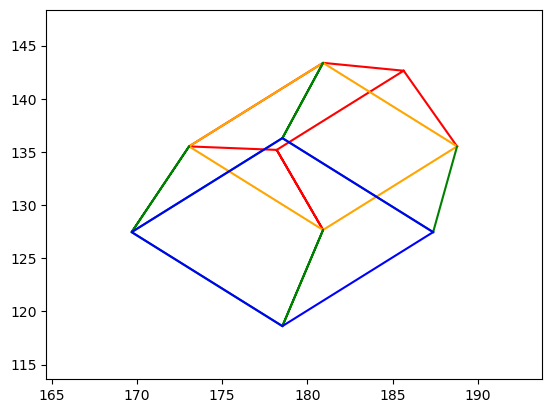

In [5]:
# Plot 2D House using Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
lineRoof = lines.Line2D(x_Roof,y_Roof,color = 'red') # roof
lineRoofBase = lines.Line2D(x_RoofBase,y_RoofBase,color = 'orange') # roof base
linePillar = lines.Line2D(x_Pillar,y_Pillar,color = 'green') # pillars
lineBase = lines.Line2D(x_Base,y_Base,color = 'blue') # Base
ax.add_line(lineRoof)
ax.add_line(lineRoofBase)
ax.add_line(linePillar)
ax.add_line(lineBase)
ax.set_xlim(min(x)-5, max(x)+5)
ax.set_ylim(min(y)-5, max(y)+5)
plt.show()